# 플랫폼 업로드를 쉽게하기 위한 로컬 개발 코드
- T3Q.ai(T3Q.cep + T3Q.dl): 빅데이터/인공지능 통합 플랫폼
- 플랫폼 업로드를 쉽게하기 위하여 로컬에서 아래의 코드(파일1)를 개발한다.
- 파일 1(파일명): 1_local_platform_image_classification.ipynb

### 전처리 객체 또는 학습모델 객체
- 전처리 객체나 학습모델 객체는 meta_data 폴더 아래에 저장한다.

### 데이터셋 (학습 데이터/테스트 데이터)
- 학습과 테스트에 사용되는 데이터를 나누어 관리한다.
- 학습 데이터: dataset 폴더 아래에 저장하거나 dataset.zip 파일 형태로 저장한다.
- 테스트 데이터: test_dataset 폴더 아래에 저장하거나 test_dataset.zip 파일 형태로 저장한다.

### 로컬 개발 워크플로우(workflow)  
- 로컬 개발 워크플로우를 다음의 4단계로 분리한다.

1. 데이터셋 준비(Data Setup)
- 로컬 저장소에서 전처리 및 학습에 필요한 학습 데이터셋을 준비한다.

2. 데이터 전처리(Data Preprocessing)
- 데이터셋의 분석 및 정규화(Normalization)등의 전처리를 수행한다.
- 데이터를 모델 학습에 사용할 수 있도록 가공한다.
- 추론과정에서 필요한 경우, 데이터 전처리에 사용된 객체를 meta_data 폴더 아래에 저장한다.

3. 학습 모델 훈련(Train Model)
- 데이터를 훈련에 사용할 수 있도록 가공한 뒤에 학습 모델을 구성한다. 
- 학습 모델을 준비된 데이터셋으로 훈련시킨다.
- 정확도(Accuracy)나 손실(Loss)등 학습 모델의 성능을 검증한다.
- 학습 모델의 성능 검증 후, 학습 모델을 배포한다.
- 배포할 학습 모델을 meta_data 폴더 아래에 저장한다.

4. 추론(Inference)
- 저장된 전처리 객체나 학습 모델 객체를 준비한다.
- 추론에 필요한 테스트 데이터셋을 준비한다.
- 배포된 학습 모델을 통해 테스트 데이터에 대한 추론을 진행한다. 

# 인공지능 통합플랫폼(T3Q.ai) 프로세스를 이해하고 인공지능 쉽게 하기

In [197]:
#image_classification_preprocess.py

'''
from image_classification_preprocess_sub import exec_process
'''

import logging

def process_for_train(pm):
    exec_process(pm)
    logging.info('[hunmin log] the end line of the function [process_for_train]')
    
def init_svc(im, rule):
    return {}

def transform(df, params, batch_id):
    logging.info('[hunmin log] df.shape : {}'.format(df.shape))
    logging.info('[hunmin log] type(df) : {}'.format(type(df)))
    logging.info('[hunmin log] the end line of the function [transform]')
    return df

In [198]:
# image_classification_preprocess_sub.py

import os
import numpy as np
import pandas as pd
import zipfile
import logging


def exec_process(pm):
    logging.info('[hunmin log] the start line of the function [exec_process]')

    # 저장 파일 확인
    list_files_directories(pm.source_path)
    
    # pm.source_path의 dataset.zip 파일을
    # pm.target_path 경로에 압축해제
    my_zip_path = os.path.join(pm.source_path,'dataset.zip')
    extract_zip_file = zipfile.ZipFile(my_zip_path)
    extract_zip_file.extractall(pm.target_path)
    extract_zip_file.close()
    
    # 저장 파일 확인
    list_files_directories(pm.target_path)

    logging.info('[hunmin log] the finish line of the function [exec_process]')

# 저장 파일 확인
def list_files_directories(path):
    # Get the list of all files and directories in current working directory
    dir_list = os.listdir(path)
    logging.info('[hunmin log] Files and directories in {} :'.format(path))
    logging.info('[hunmin log] dir_list : {}'.format(dir_list))  

In [199]:
# train.py
import logging, os
"""
from train_sub import exec_train
import t3qai_client as tc
from t3qai_client import T3QAI_TRAIN_OUTPUT_PATH, T3QAI_TRAIN_MODEL_PATH, \
                            T3QAI_TRAIN_DATA_PATH, T3QAI_TEST_DATA_PATH, T3QAI_MODULE_PATH
"""

def main():
    result = None
    result_msg = "success"
    tc.train_start()
    try:
        train()
    except Exception as e:
        result = e
        result_msg = e
        logging.info('error log : {}'.format(e))
    tc.train_finish(result, result_msg)

def train():
    exec_train()
    logging.info('[hunmin log] the end line of the function [train]')

#if __name__ == '__main__':
#    main()

In [200]:
#  train_sub.py

"""
import t3qai_client as tc
from t3qai_client import T3QAI_TRAIN_OUTPUT_PATH, T3QAI_TRAIN_MODEL_PATH, \
                            T3QAI_TRAIN_DATA_PATH, T3QAI_TEST_DATA_PATH, T3QAI_MODULE_PATH
"""

# Imports
import os
import numpy as np
import logging
import matplotlib.pyplot as plt
import torch
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation


logging.info(f'[hunmin log] tensorflow ver : {torch.__version__}')

# Check if CUDA-enabled GPUs are available
if torch.cuda.is_available():
    try:
        num_gpus = torch.cuda.device_count()
        # Optionally set which GPUs to be visible if necessary
        # For instance, to use only the first GPU, uncomment the following line:
        # torch.cuda.set_device(0)
        logging.info('[hunmin log] GPU set complete')
        logging.info('[hunmin log] Number of GPUs: {}'.format(num_gpus))
    except RuntimeError as e:
        logging.info('[hunmin log] GPU set failed')
        logging.info(e)
else:
    logging.info('[hunmin log] No CUDA-enabled GPU available')


# def exec_train():
#     logging.info('[hunmin log] the start line of the function [exec_train]')
#     logging.info('[hunmin log] T3QAI_TRAIN_DATA_PATH : {}'.format(T3QAI_TRAIN_DATA_PATH))
    
#     # 저장 파일 확인
#     list_files_directories(T3QAI_TRAIN_DATA_PATH)
#     my_path = os.path.join(T3QAI_TRAIN_DATA_PATH, 'dataset') + '/'
    
#     # 카테고리
#     dataset=['ant', 'apple', 'bus', 'butterfly', 'cup', 'envelope', 'fish', 'giraffe', 'lightbulb', 'pig']
#     dataset_num = len(dataset) #10

#     # 경로에 있는 numpy를 load하고 dataset_numpy list에 추가한다.
#     dataset_numpy = []
#     for i in range (dataset_num):
#         ad = my_path + str(dataset[i]) + '.npy'
#         dataset_numpy.append(np.load(ad))
    
#     for i in range (dataset_num):
#         logging.info('[hunmin log] : {}'.format(dataset_numpy[i].shape))
    
#     np.set_printoptions(linewidth = 116)
#     # dataset_numpy[5] 가 envelope numpy 이다.
#     logging.info('[hunmin log] envelope : {}'.format(dataset_numpy[5][0]))

#     # 카테고리별로 같은 수의 이미지를 훈련시키기 위해 훈련시키고자 하는 이미지의 개수를 정해준다.
#     idx = 1000
    
#     #데이터 정규화 (Normalization) & 데이터 합치기 & 레이블 생성
#     X: 입력 이미지 배열 데이터
#     Y: 정답 레이블 데이터
#     정규화 및 정답 레이블 생성
#     X = np.array([data_numpy[:idx, :]/255. for data_numpy in dataset_numpy]).astype('float32')
#     X = X.reshape(-1, 28*28)
#     Y = np.array([i for i in range(10) for j in range(idx)]).astype('float32')

#     # 훈련 & 평가 데이터셋 생성
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#     모델 훈련에 사용할 수 있는 형태로 변경
#     X의 값을 [samples][pixels][width][height] 형태로 reshape한다.
#     X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
#     X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')
    
#     # reshape된 결과 확인 및 원래 배열의 형태와 비교
#     logging.info('[hunmin log] X_train : {}'.format(X_train.shape))
#     logging.info('[hunmin log] X_train_cnn : {}'.format(X_train_cnn.shape))

    
#     # Y의 배열에 one-hot-encoding 진행
#     Y_train_cnn = utils.to_categorical(Y_train)
#     Y_test_cnn = utils.to_categorical(Y_test)
#     num_classes = Y_test_cnn.shape[1] # class는 총 10개이다.

#     # encoding된 결과 확인 및 원래 배열의 형태와 비교
#     logging.info('[hunmin log] Y_train : {}'.format(Y_train.shape))
#     logging.info('[hunmin log] Y_train_cnn : {}'.format(Y_train_cnn.shape))
#     logging.info('[hunmin log] class number : {}'.format(num_classes))
    
#     # 모델 구축 (Build Model)
#     # 이미지 분류를 위해 아주 간단한 CNN 모델을 Keras를 이용하여 구축하고자 한다.
    
#     # 단일 gpu 혹은 cpu학습
#     if len(gpus) < 2:
#         model = model_build_and_compile(num_classes)
#     # multi-gpu
#     else:
#         strategy = tf.distribute.MirroredStrategy()
#         logging.info('[hunmin log] gpu devices num {}'.format(strategy.num_replicas_in_sync))
#         with strategy.scope():
#             model = model_build_and_compile(num_classes)

#     # 사용자 입력 파라미터
#     user_params = tc.train_load_param()
#     batch_size = int(user_params["batch_size"])
#     epochs = int(user_params["epoch"])

#     # gpu에 따른 batch_size 설정
#     batch_size = batch_size * len(gpus) if len(gpus) > 0 else batch_size

#     # 모델 학습 (Train Model)
#     history = model.fit(X_train_cnn, Y_train_cnn, 
#                         batch_size=batch_size, 
#                         epochs=epochs, 
#                         validation_split=0.1,
#                         verbose=0, 
#                         callbacks=[LossAndErrorPrintingCallback()]
#                        )
    
#     # 모델 평가 (Evaluate Model)
#     loss, acc = model.evaluate(X_test_cnn, Y_test_cnn, verbose=0, callbacks=[LossAndErrorPrintingCallback()])

#     # 로컬 시각화
#     acc = history.history['accuracy']
#     loss = history.history['loss']
#     val_acc = history.history['val_accuracy']
#     val_loss = history.history['val_loss']
    
#     fig, ax = plt.subplots(1, 2, figsize = (10, 5))
#     ax[0].plot(acc, label = 'accuracy')
#     ax[0].plot(val_acc, label = 'val_accuracy')
#     ax[0].set_title("Accuracy")
#     ax[1].plot(loss, label = 'Loss')
#     ax[1].plot(val_loss, label = 'val_loss')
#     ax[1].set_title("Loss")
#     fig.savefig(os.path.join(T3QAI_TRAIN_OUTPUT_PATH, 'Accuracy_Loss.png'))
    
#     logging.info('[hunmin log] loss : {}'.format(loss))
#     logging.info('[hunmin log] acc : {}'.format(acc))

#     ###########################################################################
#     ## 플랫폼 시각화
#     ###########################################################################
#     """
#     plot_metrics(tc, history, model, X_test_cnn, Y_test_cnn)
#     """
    
#     logging.info('[hunmin log] T3QAI_TRAIN_MODEL_PATH : {}'.format(T3QAI_TRAIN_MODEL_PATH))
#     model.save(os.path.join(T3QAI_TRAIN_MODEL_PATH, 'cnn_model.h5'))
    
#     # 저장 파일 확인
#     list_files_directories(T3QAI_TRAIN_MODEL_PATH)
    
#     logging.info('[hunmin log] the finish line of the function [exec_train]')
    
# ###########################################################################
# ## exec_train() 호출 함수 
# ###########################################################################
# # for epoch, loss
# class LossAndErrorPrintingCallback(keras.callbacks.Callback):
#     def on_epoch_end(self, batch, logs={}):
#         logging.info('[hunmin log] For epoch {}, loss is {:.2f}.'.format(batch+1, logs['loss']))

# def model_build_and_compile(num_classes):
#     #모델 구축
#     model = keras.Sequential(
#         [
#             layers.Input(shape=(28,28,1)),
#             layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"),
#             layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
#             layers.Dropout(0.25),
#             layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
#             layers.MaxPooling2D(pool_size=(2, 2)),
#             layers.Flatten(),
#             layers.Dense(32, activation="relu"),
#             layers.Dropout(0.25),
#             layers.Dense(num_classes, activation="softmax")
#         ]
#     )
#     logging.info('[hunmin log] model.summary() :')
#     model.summary(print_fn=logging.info)
    
#     # 모델 컴파일 (Compile Model)
#     model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
#     return model
    
# # 시각화
# def plot_metrics(tc, history, model, x_test, y_test):
#     from sklearn.metrics import confusion_matrix
    
#     accuracy_list = history.history['accuracy']
#     loss_list = history.history['loss']
    
#     for step, (acc, loss) in enumerate(zip(accuracy_list, loss_list)):
#         metric={}
#         metric['accuracy'] = acc
#         metric['loss'] = loss
#         metric['step'] = step
#         tc.train_save_stat_metrics(metric)

#     predict_y = np.argmax(model.predict(x_test), axis = 1).tolist()
#     actual_y = np.argmax(y_test, axis = 1).tolist()
    
#     eval_results={}
#     eval_results['predict_y'] = predict_y
#     eval_results['actual_y'] = actual_y
#     eval_results['accuracy'] = history.history['val_accuracy'][-1]
#     eval_results['loss'] = history.history['val_loss'][-1]

#     # calculate_confusion_matrix(eval_results)
#     eval_results['confusion_matrix'] = confusion_matrix(actual_y, predict_y).tolist()
#     tc.train_save_result_metrics(eval_results)
#     logging.info('[hunmin log] accuracy and loss curve plot for platform')
    
# 저장 파일 확인
# def list_files_directories(path):
#     # Get the list of all files and directories in current working directory
#     dir_list = os.listdir(path)
#     logging.info('[hunmin log] Files and directories in {} :'.format(path))
#     logging.info('[hunmin log] dir_list : {}'.format(dir_list)) 

INFO:root:[hunmin log] tensorflow ver : 2.0.1
INFO:root:[hunmin log] No CUDA-enabled GPU available


In [201]:
# inference_service.py

"""
from inference_service_sub import exec_init_model, exec_inference_dataframe, exec_inference_file
"""

import logging
logger = logging.getLogger()
logger.setLevel('INFO')

def init_model():
    params = exec_init_model()
    logging.info('[hunmin log] the end line of the function [init_model]')
    return { **params }


def inference_dataframe(df, model_info_dict):
    result = exec_inference_dataframe(df, model_info_dict)
    logging.info('[hunmin log] the end line of the function [inference_dataframe]')
    return { **result }


def inference_file(files, model_info_dict):
    result = exec_inference_file(files, model_info_dict)
    logging.info('[hunmin log] the end line of the function [inference_file]')
    return result

In [218]:
import base64
from PIL import Image, ImageDraw
import numpy as np
import io
import cv2
import requests
from dotenv import load_dotenv
import os
"""
city scapes dataset
    "0": "road",
    "1": "sidewalk",
    "2": "building",
    "3": "wall",
    "4": "fence",
    "5": "pole",
    "6": "traffic light",
    "7": "traffic sign",
    "8": "vegetation",
    "9": "terrain",
    "10": "sky",
    "11": "person",
    "12": "rider",
    "13": "car",
    "14": "truck",
    "15": "bus",
    "16": "train",
    "17": "motorcycle",
    "18": "bicycle"
"""
def calculate_pixel_area(mask_data):
    areas = []
    
    # print("SEG TEST")
    for item in mask_data:
        # print(item)
        mask_bytes = base64.b64decode(item['mask'])
        mask_image = Image.open(io.BytesIO(mask_bytes))
        mask_array = np.array(mask_image)
        pixel_count = np.count_nonzero(mask_array)

        areas.append({'label': item['label'], 'pixels': pixel_count, 'mask': item['mask']})
    return areas

def overlay_multiple_masks_on_image(mask_data, indices, original_image, colors, alpha=0.5):
    # Load the original image
    # original_image = Image.open(original_image_path).convert("RGBA")
    original_image = original_image.convert("RGBA")

    # Create a blank RGBA image for the mask
    mask_rgba = Image.new("RGBA", original_image.size)

    # Decode and process each mask
    for index, color in zip(indices, colors):
        item = mask_data[index]

        # Decode the base64 string to bytes for the mask
        mask_bytes = base64.b64decode(item['mask'])
        mask_image = Image.open(io.BytesIO(mask_bytes)).convert("L")

        # Convert mask image to numpy array
        mask_array = np.array(mask_image)

        # Overlay each mask with the specified color
        for y in range(mask_image.height):
            for x in range(mask_image.width):
                if mask_array[y, x] > 0:  # If the pixel is part of the mask
                    mask_rgba.putpixel((x, y), color + (int(255 * alpha),))

    # Combine the original image with the mask
    combined = Image.alpha_composite(original_image, mask_rgba)

    # Draw the borders around the mask areas
    draw = ImageDraw.Draw(combined)
    for index, color in zip(indices, colors):
        item = mask_data[index]
        mask_bytes = base64.b64decode(item['mask'])
        mask_image = Image.open(io.BytesIO(mask_bytes)).convert("L")
        mask_array = np.array(mask_image)
        
        contours, _ = cv2.findContours(mask_array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            contour = contour.squeeze()
            if contour.ndim == 2:
                contour = [tuple(pt) for pt in contour]
                draw.line(contour + [contour[0]], fill=color + (255,), width=3)

    return combined


def get_bounding_box_from_mask(base64_str):
    # Decode the base64 string to get image bytes
    image_bytes = base64.b64decode(base64_str)
    
    # Create an image from the bytes
    image = Image.open(io.BytesIO(image_bytes))
    
    # Convert the image to a numpy array
    mask = np.array(image)
    
    # Ensure the mask is binary
    mask = mask > 0
    
    # Find the coordinates where the mask is True
    coords = np.column_stack(np.where(mask))
    
    # Get the bounding box coordinates
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    
    return x_min, y_min, x_max, y_max

################################################
# for query
# def query(filename):
#     "query to huggingface inference api"

#     load_dotenv(dotenv_path=".env")
#     API_URL = os.getenv('API_URL_SEG')
#     HF_token = os.getenv('HF_token')
#     headers = {"Authorization": f"Bearer {HF_token}"}

#     with open(filename, "rb") as f:
#         data = f.read()
#     response = requests.post(API_URL, headers=headers, data=data)

#     return response.json()


def visualize_bbox(input_image, car_bbox):
    output_image = np.array(input_image.copy())

    xmin, ymin, xmax, ymax = car_bbox
    color = (255, 255, 255)
    thickness = 3
    cv2.rectangle(output_image, (xmin, ymin), (xmax, ymax), color, thickness)

    return Image.fromarray(output_image)

################################################
# main process
def seg_process(img, output):
    # output = query(image_path)

    # if 'error' in output:
    #     return None, None, None, None, output['error']

    if not output:
        return None, None, None, None

    areas = calculate_pixel_area(output)
    car_index = []
    road_index = None
    sidewalk_index = None

    print('calculate_pixel_area: 차량이 차지하는 픽셀 계산')
    for i in range(len(areas)):
        label = areas[i]['label']
        print(f"{i}. Label: {label}, Pixels: {areas[i]['pixels']}")
        if label in ['car', 'truck', 'bus', 'motorcycle'] :
            car_index.append(i)
        elif label == 'road':
            road_index = i
        elif label == 'sidewalk':
            sidewalk_index = i
    
    # Sort by area
    car_index.sort(key=lambda idx: areas[idx]['pixels'], reverse=True)

    indices = []
    colors = []

    seg_label = []
    if car_index:
        seg_label.append(areas[car_index[0]]['label'])
    if sidewalk_index:
        seg_label.append('sidewalk')
    if road_index:
        seg_label.append('road')
    

    if road_index is not None:
        indices.append(road_index)
        colors.append((255, 0, 0))  # Red for road

    if sidewalk_index is not None:
        indices.append(sidewalk_index)
        colors.append((0, 255, 0))  # Green for sidewalk

    if car_index:
        indices.append(car_index[0])
        colors.append((0, 0, 255))  # Blue for largest car

    if indices:
        output_image = overlay_multiple_masks_on_image(mask_data=output,
                                                       indices=indices,
                                                       original_image=img,
                                                       colors=colors)
    
    else:
        return None, None, None, seg_label, "can't detect car/road/sidewalk (in SEG)"
    
    if len(car_index) == 0:
        return output_image, areas, None, seg_label, "can't detect car(or vehicles) (in SEG)"

    car_bbox = get_bounding_box_from_mask(areas[car_index[0]]['mask'])
    output_image = visualize_bbox(output_image, car_bbox)

    return output_image, areas, car_bbox, seg_label, None

In [253]:
# inference_service_sub.py
import os
import io
import base64
import logging
import numpy as np
from PIL import Image
import requests
import torch
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

"""
from t3qai_client import DownloadFile
import t3qai_client as tc
from t3qai_client import T3QAI_TRAIN_OUTPUT_PATH, T3QAI_TRAIN_MODEL_PATH, T3QAI_TRAIN_DATA_PATH, \
                            T3QAI_TEST_DATA_PATH, T3QAI_MODULE_PATH, T3QAI_INIT_MODEL_PATH
"""

def exec_init_model():
    processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-cityscapes-panoptic")
    model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-cityscapes-panoptic")

    model_info_dict = {
        "model": model,
        "processor": processor
    }
    return model_info_dict


def exec_inference_file(files, model_info_dict):
    
    """파일기반 추론함수는 files와 로드한 model을 전달받습니다."""
    logging.info('[hunmin log] the start line of the function [exec_inference_file]')
    
    # 모델, 인력값 프로세서 준비
    model = model_info_dict['model']
    processor = model_info_dict['processor']

    inference_result = []
    postprocessed_result = []
    
    # 모델 추론
    for one_file in files:
        logging.info(f'[hunmin log] inference: {one_file.filename}')
        
        # 모델 입력값 구성
        inference_file = one_file.file
        img = Image.open(inference_file)
        input = processor(images=img, return_tensors='pt')

        logging.info(f'[hunmin log] predict: {one_file.filename}')
        
        # 모델 추론 요청
        with torch.no_grad():
            output = model(**input)

            # 모델 추론 결과를 {segmentation, segment_info} 객체로 변환
            output2 = processor.post_process_panoptic_segmentation(output, target_sizes=[img.size[::-1]])[0]
            
            # 모델 추론 결과를 [{score, label, mask},...] 객체배열 로 변환
            output3 = []
            segmentations = output2['segmentation']
            segments_infos = output2['segments_info']
            for i in range(len(segments_infos)): 
                result_dict = {}
                result_dict['score'] = segments_infos[i]['score']
                segment_id = segments_infos[i]['label_id']
                result_dict['label'] = model.config.id2label[segment_id]
                result_dict['mask_image'] = get_mask(segment_id, segmentations)
                result_dict['mask'] = base64_encoding(get_mask(segment_id, segmentations))
                output3.append(result_dict)
            
            seg_image, areas, car_bbox, seg_result, seg_error = seg_process(img, output3)
            
    
    # 모델 추론 결과반환
    inference_result = output2
    postprocessed_result.append({ "seg_image": seg_image, "areas":areas, "car_bbox":car_bbox, "seg_result":seg_result, "seg_error":seg_error,\
                             "output3": output3})
    result = {'inference' :  inference_result, 'postprocessed': postprocessed_result }
    return result

# segmentations 텐서로부터, 각 세그먼트의 마스크를 생성
def get_mask(segment_id, segmentations):
  mask = (segmentations.numpy() == segment_id)
  visual_mask = (mask * 255).astype(np.uint8)
  visual_mask = Image.fromarray(visual_mask)

  return visual_mask


import base64
from PIL import Image
from io import BytesIO

# 마스크를 base64형태로 변환
def base64_encoding(image):
    # Save the image to a BytesIO object
    buffered = BytesIO()
    image.save(buffered, format="PNG")  # You can choose the format you need, e.g., PNG, JPEG
    image_data = buffered.getvalue()

    # Encode the image data in base64
    base64_encoded = base64.b64encode(image_data).decode('utf-8')

    return base64_encoded

In [204]:
import os
import shutil
import tempfile
import base64
import pandas as pd

import ipywidgets
from ipywidgets import FileUpload
from IPython.display import FileLink

# t3qai_client 클래스: t3qai_client 객체
class t3qai_client:
    def train_start(self):
        return None

    def train_finish(self, result, result_msg):
        if result_msg != "success":
            raise Exception(result_msg)
        else:
            logging.info(result)
            logging.info("train finish")

    def train_load_param(self):
        '''set_param'''
        epoch = 20
        batch_size = 16
        params = {"epoch" : epoch, 'batch_size' : batch_size}
        return { **params }

class PM:
    def __init__(self):
        self.source_path = './'
        self.target_path = './meta_data'
        
class UploadFile:
    def __init__(self, file, filename):
        self.file = file
        self.filename = filename

pm = PM()

T3QAI_TRAIN_OUTPUT_PATH = './meta_data'
T3QAI_TRAIN_MODEL_PATH = './meta_data'
T3QAI_TRAIN_DATA_PATH = './meta_data'
T3QAI_TEST_DATA_PATH = './meta_data'
T3QAI_MODULE_PATH = './meta_data'
T3QAI_INIT_MODEL_PATH = './meta_data'


# t3qai_client 객체
tc = t3qai_client()
print('T3QAI_TRAIN_OUTPUT_PATH:', T3QAI_TRAIN_OUTPUT_PATH)
print('T3QAI_TRAIN_MODEL_PATH:', T3QAI_TRAIN_MODEL_PATH)
print('T3QAI_TRAIN_DATA_PATH:', T3QAI_TRAIN_DATA_PATH)
print('T3QAI_TEST_DATA_PATH:', T3QAI_TEST_DATA_PATH)
print('T3QAI_MODULE_PATH:', T3QAI_MODULE_PATH)
print('T3QAI_INIT_MODEL_PATH:', T3QAI_INIT_MODEL_PATH)

# init_svc(im, rule) 함수 입력
im = None
rule = None
# transform(df, params, batch_id) 함수 입력
batch_id = 0

import io
import pandas as pd

# inference_file 함수 추론
files = []

uploader = FileUpload(accept='*', multiple=True, description='select data', button_style='danger')
def uploader_change(change):
    uploader.button_style='success'
    count = len(uploader.value)
    uploader._counter = count
    files.clear()
    for file_num in range(count):
        temp_data = tempfile.TemporaryFile()
        if ipywidgets.__version__[0] == '7':
            temp_data.write(list(uploader.value.values())[file_num]['content'])
            file = UploadFile(temp_data, pd.DataFrame(list(uploader.value.values())[file_num]).iloc[1,0])
        elif int(ipywidgets.__version__[0]) > 7:
            temp_data.write(uploader.value[file_num].content)
            file = UploadFile(temp_data, uploader.value[file_num].name)
        files.append(file)

uploader.observe(uploader_change, 'value')

T3QAI_TRAIN_OUTPUT_PATH: ./meta_data
T3QAI_TRAIN_MODEL_PATH: ./meta_data
T3QAI_TRAIN_DATA_PATH: ./meta_data
T3QAI_TEST_DATA_PATH: ./meta_data
T3QAI_MODULE_PATH: ./meta_data
T3QAI_INIT_MODEL_PATH: ./meta_data


In [205]:
%%time
# process_for_train(pm)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.67 μs


In [206]:
%%time
# main() 함수에서 train() 함수 실행
# main()

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 2.15 μs


In [207]:
%%time
model_info_dict = init_model()

INFO:root:[hunmin log] the end line of the function [init_model]


CPU times: user 394 ms, sys: 695 ms, total: 1.09 s
Wall time: 1.27 s


### CASE  [File - Dictionary]
File 에 대한 추론 결과를 딕셔너리(Dictionary) 형태로 리턴(return)

 1. 아래 Cell을 실행하면 select data 버튼이 생성됩니다.
 2. 생성된 select data 버튼을 눌러 추론할 데이터를 선택하세요.
 3. 선택 후 **inference_file(files, model_info_dict)** 을 실행하세요.

In [275]:
# uploader widget(해당 커널 output의 버튼)에 파일을 업로드 한 뒤 infernece_file으로 추론합니다.
display(uploader)

FileUpload(value=({'name': '00023.png', 'type': 'image/png', 'size': 2616680, 'content': <memory at 0x2c5d00dc…

In [276]:
%%time
result = inference_file(files, model_info_dict)

INFO:root:[hunmin log] the start line of the function [exec_inference_file]
INFO:root:[hunmin log] inference: 00016.jpeg
INFO:root:[hunmin log] predict: 00016.jpeg
`label_ids_to_fuse` unset. No instance will be fused.


calculate_pixel_area: 차량이 차지하는 픽셀 계산
0. Label: car, Pixels: 4423
1. Label: car, Pixels: 4423
2. Label: car, Pixels: 4423
3. Label: fence, Pixels: 4949
4. Label: vegetation, Pixels: 1502
5. Label: pole, Pixels: 84864
6. Label: car, Pixels: 4423
7. Label: car, Pixels: 4423
8. Label: car, Pixels: 4423
9. Label: car, Pixels: 4423
10. Label: building, Pixels: 169
11. Label: car, Pixels: 4423
12. Label: wall, Pixels: 428
13. Label: car, Pixels: 4423
14. Label: road, Pixels: 281
15. Label: car, Pixels: 4423
16. Label: person, Pixels: 7930
17. Label: terrain, Pixels: 389
18. Label: car, Pixels: 4423
19. Label: person, Pixels: 7930
20. Label: sky, Pixels: 281


INFO:root:[hunmin log] the end line of the function [inference_file]


CPU times: user 3.53 s, sys: 1.35 s, total: 4.88 s
Wall time: 1.76 s


In [270]:
result['inference']

{'segmentation': tensor([[3, 3, 3,  ..., 6, 6, 6],
         [3, 3, 3,  ..., 6, 6, 6],
         [3, 3, 3,  ..., 6, 6, 6],
         ...,
         [8, 8, 8,  ..., 8, 8, 8],
         [8, 8, 8,  ..., 8, 8, 8],
         [8, 8, 8,  ..., 8, 8, 8]], dtype=torch.int32),
 'segments_info': [{'id': 1,
   'label_id': 13,
   'was_fused': False,
   'score': 0.999977},
  {'id': 2, 'label_id': 4, 'was_fused': False, 'score': 0.957103},
  {'id': 3, 'label_id': 8, 'was_fused': False, 'score': 0.999946},
  {'id': 4, 'label_id': 5, 'was_fused': False, 'score': 0.999428},
  {'id': 5, 'label_id': 14, 'was_fused': False, 'score': 0.990133},
  {'id': 6, 'label_id': 2, 'was_fused': False, 'score': 0.999759},
  {'id': 7, 'label_id': 11, 'was_fused': False, 'score': 0.844797},
  {'id': 8, 'label_id': 0, 'was_fused': False, 'score': 0.999994},
  {'id': 9, 'label_id': 9, 'was_fused': False, 'score': 0.83942},
  {'id': 10, 'label_id': 1, 'was_fused': False, 'score': 0.994671},
  {'id': 11, 'label_id': 13, 'was_fused'

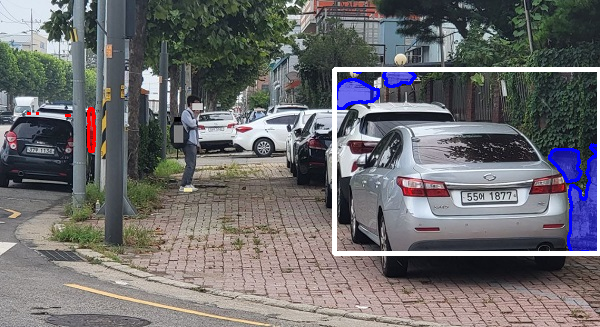

In [277]:
result['postprocessed'][0]['seg_image']

In [278]:
result['postprocessed'][0]['output3']

[{'score': 0.99895,
  'label': 'car',
  'mask_image': <PIL.Image.Image image mode=L size=600x327>,
  'mask': 'iVBORw0KGgoAAAANSUhEUgAAAlgAAAFHCAAAAABYZW3TAAAD8klEQVR4nO3dy3abMBRAUejK//8yHSRpbYOEhHUNEntPkmAPeJwKajBMEwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDH5rNngCfLNE1DbJUBFuHilp+fyTW9bE/ufMv8OXsGbi/RVXJ6Jzr/d9GJJb2ic/30vHF6nvchZAemjreOXeGVdbw7FNa5dtLptyxhXVu3ZQnrXHtHUd0eZQnrZPlyuu2q4znvwc+OLL+SM3u7jrdOx7N+cc+9ZNZzOqyeN87X2TMwqNdalq4rOeBmi/spm6PQ9roec8Dqe+avKtXK5sp+ffP8O7XvTdP33F9T5dF48cFYV0ZZjiupPf23ZF/t1DhLchl7H5an0hprU4y1NFewfxLmFuv8Fgv5UUVn98Zf7eMv4acVnzYee9U7V9hY+eUI3V64UERYhBAWIYRFCGERQliEENZpfNwA1YTVVvmHU2MPWK4gPcngWRmxGisdsIbvSlinGL8ru8IPmYe86CrjNgv6Getd4V1XsBEr0l2rmm696CEeh6xbr1sH723Nm7/ekLAam1e/3JOwWpuffgAAAAAAAAAAAAAAAAAAAAAAAAAAAAzl937k7sFKS//uc++uyYQQFg39fzCHsAjhGItSRY82c/BOncTDY1cBLYnpsCX9UOLXhL7f6RiLEpmHXb++9B2asAghLFqbp0lYFMnsCRNv9kxo9tV09fNeIxZN/TYoLFpyEpoKxZ92OldIlWxZy8ZvwqJI0Zj1eIwvLIrUnvsTFmXSZW2+IiwK1Y1ZwqJUoqztycKiWM2YJSzKVZQlLEIIiwpbQ9b2GWphUSNX1lNhwq